In [1]:
import pandas as pd
import numpy as np

In [2]:
%time df = pd.read_csv("./status.csv")

CPU times: user 48.4 s, sys: 7.87 s, total: 56.3 s
Wall time: 50.8 s


In [4]:
df.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [40]:
datime = df["time"]
datime = datime.astype(str)
datime = datime.str.split(" ",expand=True)

In [41]:
date=datime.loc[:,0].str.split("/",expand=True)
time=datime.loc[:,1].str.split(":",expand=True)
datetime = pd.concat([date,time],axis=1)
datime_concat = pd.concat([df,datetime],axis=1)
datime_concat.columns=(['station_id','bikes_available','docks_available','time','year','month','day','hour','min','sec'])
datime_concat.head(10)


,station_id,bikes_available,docks_available,time,year,month,day,hour,min,sec
0,2,2,25,2013/08/29 12:06:01,2013,08,29,12,06,01
1,2,2,25,2013/08/29 12:07:01,2013,08,29,12,07,01
2,2,2,25,2013/08/29 12:08:01,2013,08,29,12,08,01
3,2,2,25,2013/08/29 12:09:01,2013,08,29,12,09,01
4,2,2,25,2013/08/29 12:10:01,2013,08,29,12,10,01
5,2,2,25,2013/08/29 12:11:01,2013,08,29,12,11,01
6,2,2,25,2013/08/29 12:12:01,2013,08,29,12,12,01
7,2,2,25,2013/08/29 12:13:01,2013,08,29,12,13,01
8,2,2,25,2013/08/29 12:15:01,2013,08,29,12,15,01
9,2,2,25,2013/08/29 12:16:02,2013,08,29,12,16,02


In [43]:
len(datime_concat)

71984434

In [42]:
datime_concat['dock'] = datime_concat['bikes_available']+datime_concat['docks_available']
datime_concat['dock_shift'] = datime_concat['docks_available'].shift()
datime_concat['retu_borr'] = datime_concat['docks_available']-datime_concat['dock_shift']
datime_concat.loc[datime_concat['retu_borr']>0,'retu']=1
datime_concat['retu']=datime_concat['retu'].fillna(0)
datime_concat.loc[datime_concat['retu_borr']<0,'borr']=1
datime_concat['borr']=datime_concat['borr'].fillna(0)

datime_concat['min']=datime_concat['min'].astype('int32')
datime_concat.loc[datime_concat['min']<=30,'to_half']=1
datime_concat['to_half']=datime_concat['to_half'].fillna(0)

# datime_concat.loc[datime_concat['min']>30,'to_one']=1
# datime_concat['to_one']=datime_concat['to_one'].fillna(0)

datime_concat_value = datime_concat.groupby(['station_id','year','month','day','hour','to_half'])['borr'].sum().reset_index()


station_id  year  month  day  hour  to_half  to_one
2           2013  08     29   12    0.0      1.0       0.0
                                    1.0      0.0       0.0
                              13    0.0      1.0       0.0
                                    1.0      0.0       1.0
                              14    0.0      1.0       0.0
Name: borr, dtype: float64

(array([5.21841e+05, 4.57230e+04, 3.61800e+03, 2.37900e+03, 3.71000e+02,
        3.31000e+02, 1.09000e+02, 1.00000e+01, 1.40000e+01, 1.00000e+00]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

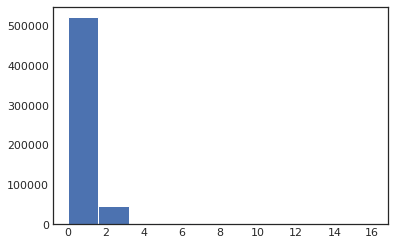

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
plt.hist(datime_concat_value)